In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


In [ ]:
#import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
datasets = {
    "train": "/kaggle/input/rossmann-store-sales/train.csv",
    "test": "/kaggle/input/rossmann-store-sales/test.csv",
    "store": "/kaggle/input/rossmann-store-sales/store.csv"
}

In [ ]:
store_data = pd.read_csv(datasets["store"])
train_data = pd.read_csv(datasets["train"])
test_data =pd.read_csv(datasets["test"])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Info

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [ ]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
df=store_data.merge(train_data,on=["Store"],how="inner")
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


<AxesSubplot:>

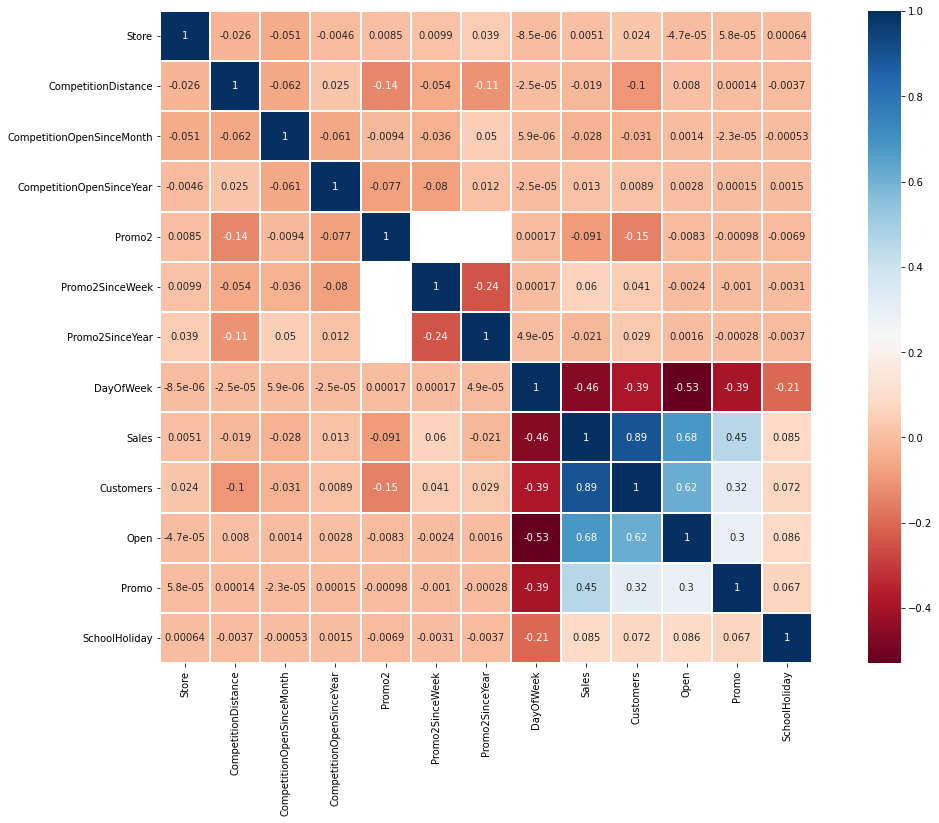

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


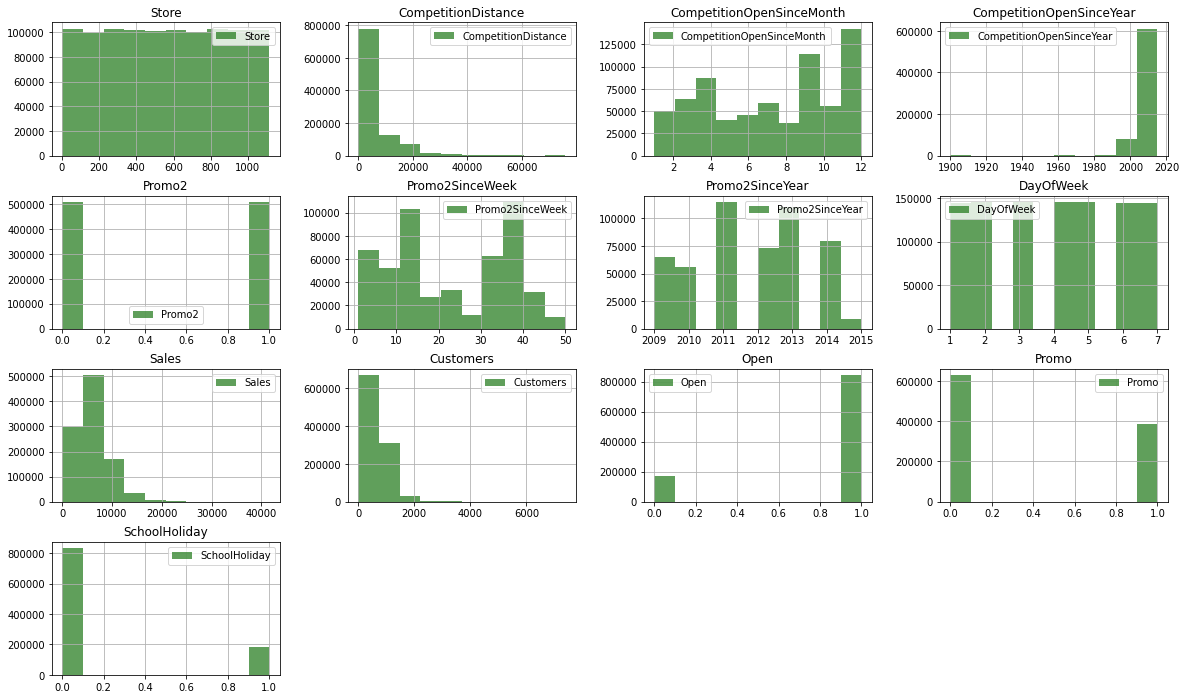

In [ ]:
df.hist(figsize=(20,12), color="#107009AA", legend=True)
plt.show()

In [ ]:
test_df = store_data.merge(test_data,on=["Store"],how="inner")

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   StoreType                  41088 non-null  object 
 2   Assortment                 41088 non-null  object 
 3   CompetitionDistance        40992 non-null  float64
 4   CompetitionOpenSinceMonth  25872 non-null  float64
 5   CompetitionOpenSinceYear   25872 non-null  float64
 6   Promo2                     41088 non-null  int64  
 7   Promo2SinceWeek            23856 non-null  float64
 8   Promo2SinceYear            23856 non-null  float64
 9   PromoInterval              23856 non-null  object 
 10  Id                         41088 non-null  int64  
 11  DayOfWeek                  41088 non-null  int64  
 12  Date                       41088 non-null  object 
 13  Open                       41077 non-null  flo

# Handling Missing Values

In [ ]:
# % of missing values in coumns
df.isna().sum() / df.shape[0] * 100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
dtype: float64

В колонках [Promo2SinceWeek, Promo2SinceYear, PromoInterval ] > 30% данных пропущенно, поэтому работать с ними будет очень тяжело, а восстановление может сильно ухудшить работу модели.

In [ ]:
drop_missing_values_columns = ["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]
df = df.drop(drop_missing_values_columns, axis = 1)

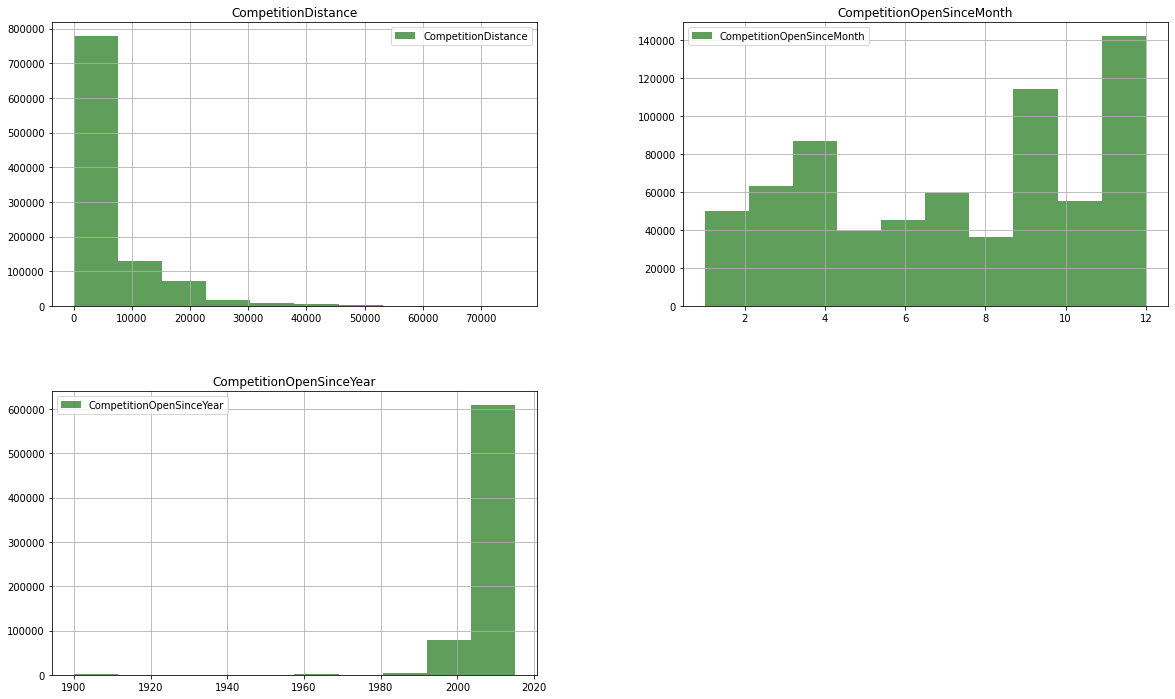

In [ ]:
df[["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].hist(figsize=(20,12), color="#107009AA", legend=True)
plt.show()

In [ ]:
df.CompetitionDistance.fillna(df.CompetitionDistance.mode()[0], inplace=True)
df.CompetitionOpenSinceYear.fillna(df.CompetitionOpenSinceYear.mode()[0], inplace=True)
df.CompetitionOpenSinceMonth = df.CompetitionOpenSinceMonth.ffill().bfill()

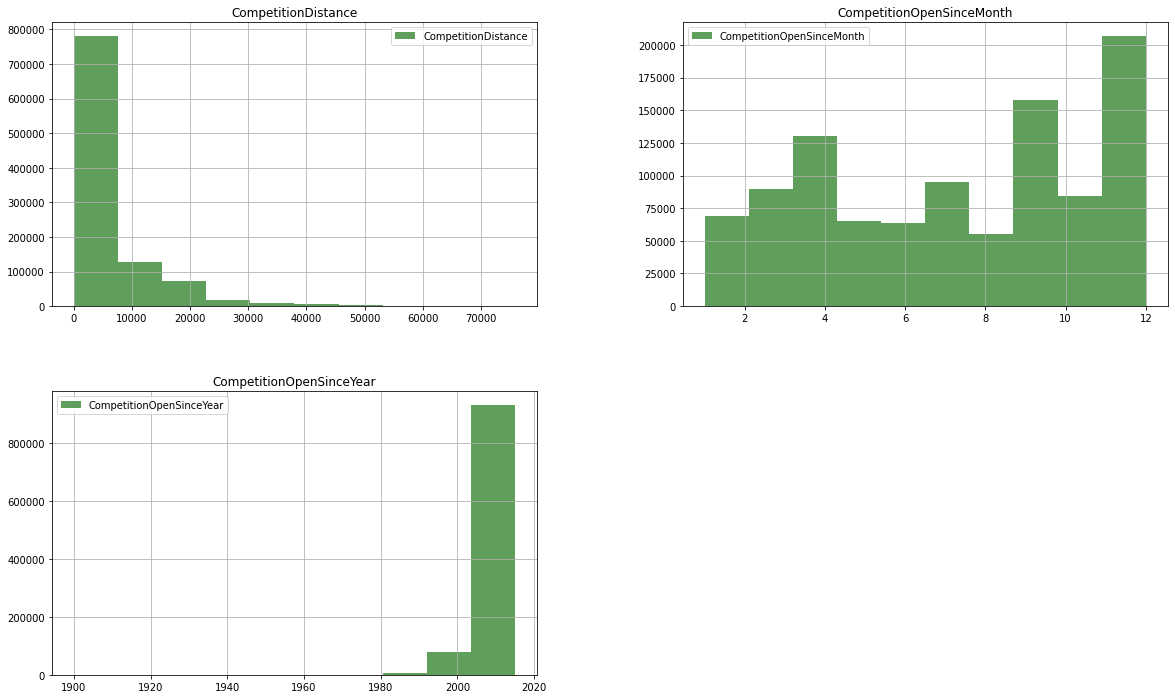

In [ ]:
df[["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].hist(figsize=(20,12), color="#107009AA", legend=True)
plt.show()

In [ ]:
test_df.isna().sum() / df.shape[0] * 100

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.009438
CompetitionOpenSinceMonth    1.495858
CompetitionOpenSinceYear     1.495858
Promo2                       0.000000
Promo2SinceWeek              1.694047
Promo2SinceYear              1.694047
PromoInterval                1.694047
Id                           0.000000
DayOfWeek                    0.000000
Date                         0.000000
Open                         0.001081
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
dtype: float64

In [ ]:
drop_missing_values_columns = ["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]
test_df = test_df.drop(drop_missing_values_columns, axis = 1)
test_df.Open.fillna(df.CompetitionDistance.mode()[0], inplace=True)
test_df.CompetitionDistance.fillna(test_df.CompetitionDistance.mode()[0], inplace=True)
test_df.CompetitionOpenSinceYear.fillna(test_df.CompetitionOpenSinceYear.mode()[0], inplace=True)
test_df.CompetitionOpenSinceMonth = test_df.CompetitionOpenSinceMonth.ffill().bfill()

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   StoreType                  41088 non-null  object 
 2   Assortment                 41088 non-null  object 
 3   CompetitionDistance        41088 non-null  float64
 4   CompetitionOpenSinceMonth  41088 non-null  float64
 5   CompetitionOpenSinceYear   41088 non-null  float64
 6   Promo2                     41088 non-null  int64  
 7   Id                         41088 non-null  int64  
 8   DayOfWeek                  41088 non-null  int64  
 9   Date                       41088 non-null  object 
 10  Open                       41088 non-null  float64
 11  Promo                      41088 non-null  int64  
 12  StateHoliday               41088 non-null  object 
 13  SchoolHoliday              41088 non-null  int

# Handling Outliers

In [ ]:
def outliers_plot(dataframe, labels, typeOfPlot=0):
    if typeOfPlot in [0, 2]:
        plt.figure(figsize=(7,7))
        sns.scatterplot(data=dataframe, x=labels['x'], y=labels['y'])
        plt.show()
    if typeOfPlot in [1, 2]:    
        plt.figure(figsize=(7,7))
        sns.set(style="whitegrid")
        sns.boxenplot(data=dataframe,scale="linear",x=labels['x'],y=labels['y'], color="orange")
        plt.show()

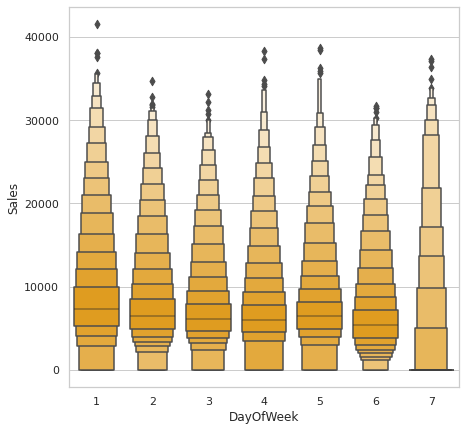

In [ ]:
outliers_plot(df, {'x': "DayOfWeek", 'y': "Sales"}, 1)

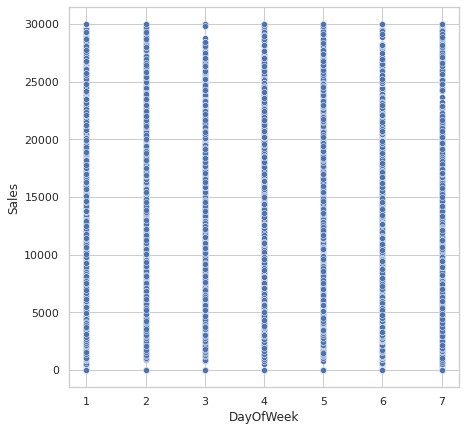

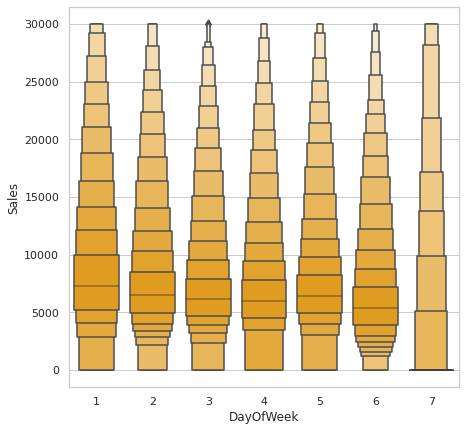

In [ ]:
df["Sales"]=df["Sales"].apply(lambda x: 30000 if x>30000 else x)
outliers_plot(df, {'x': "DayOfWeek", 'y': "Sales"}, 2)

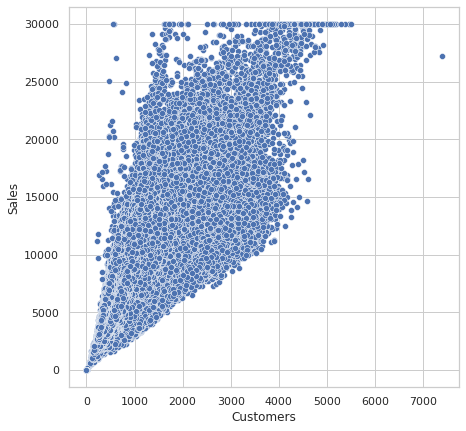

In [ ]:
outliers_plot(df, {'x': "Customers", 'y': "Sales"}, 0)

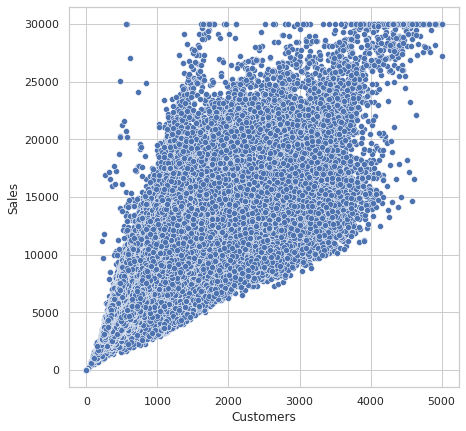

In [ ]:
df["Customers"]=df["Customers"].apply(lambda x: 5000 if x>5000 else x)
outliers_plot(df, {'x': "Customers", 'y': "Sales"}, 0)

# Handling duplicates

In [ ]:
df.duplicated(subset=['Date', 'Store']).unique()

array([False])

# Time columns

In [ ]:
# data extraction
df['Date'] = pd.to_datetime(df["Date"])
df['Year'] = df["Date"].dt.year
df['Month'] = df["Date"].dt.month
df['Day'] = df["Date"].dt.day
df['WeekOfMonth'] = df["Date"].dt.isocalendar().week%4
df["Season"] = np.where(df["Month"].isin([3,4]),"Spring",np.where(df["Month"].isin([5,6,7,8]), "Summer",np.where(df["Month"].isin([9,10,11]),"Fall",np.where(df["Month"].isin([12,1,2]),"Winter","None"))))

In [ ]:
week_data = pd.DataFrame({"Holiday per week": df["SchoolHoliday"],"WeekOfMonth": df["WeekOfMonth"],"Month": df["Month"],"Year": df["Year"],"Date": df["Date"]})
week_data = week_data.drop_duplicates(subset=['Date'])
week_data["Customers per Week"] = df["Customers"]
week_data["Promo per Week"] = df["Promo"]
week_data.groupby(["Year","Month","WeekOfMonth"]).sum()

Holiday per week  Customers per Week  Promo per Week
Year Month WeekOfMonth                                                      
2013 1     0                           0                3862               5
           1                           6                4702               0
           2                           5                3918               5
           3                           0                3417               0
     2     0                           0                3880               5
...                                  ...                 ...             ...
2015 6     3                           0                3991               7
     7     0                           0                2880               0
           1                           0                3195               5
           2                           0                2920               0
           3                           5                5029               8

[124 rows x 3 columns]

In [ ]:
df = df.merge(week_data.groupby(["Year", "Month", "WeekOfMonth"])["Holiday per week"].sum(), on=["Year", "Month", "WeekOfMonth"], how="inner")

In [ ]:
test_df['Date'] = pd.to_datetime(test_df["Date"])
test_df['Year'] = test_df["Date"].dt.year
test_df['Month'] =test_df["Date"].dt.month
test_df['Day'] = test_df["Date"].dt.day
test_df['WeekOfMonth'] = test_df["Date"].dt.isocalendar().week%4
test_df["Season"] = np.where(test_df["Month"].isin([3,4]),"Spring",np.where(test_df["Month"].isin([5,6,7,8]), "Summer",np.where(test_df["Month"].isin([9,10,11]),"Fall",np.where(test_df["Month"].isin([12,1,2]),"Winter","None"))))

In [ ]:
week_test_data = pd.DataFrame({"Holiday per week": test_df["SchoolHoliday"],"WeekOfMonth": test_df["WeekOfMonth"],"Month": test_df["Month"],"Year": test_df["Year"],"Date": test_df["Date"]})
week_test_data = week_test_data.drop_duplicates(subset=['Date'])
test_df = test_df.merge(week_test_data.groupby(["Year", "Month", "WeekOfMonth"])["Holiday per week"].sum(), on=["Year", "Month", "WeekOfMonth"], how="inner")

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  int64         
 1   StoreType                  41088 non-null  object        
 2   Assortment                 41088 non-null  object        
 3   CompetitionDistance        41088 non-null  float64       
 4   CompetitionOpenSinceMonth  41088 non-null  float64       
 5   CompetitionOpenSinceYear   41088 non-null  float64       
 6   Promo2                     41088 non-null  int64         
 7   Id                         41088 non-null  int64         
 8   DayOfWeek                  41088 non-null  int64         
 9   Date                       41088 non-null  datetime64[ns]
 10  Open                       41088 non-null  float64       
 11  Promo                      41088 non-null  int64         
 12  Stat

# Handling Categorical Data

In [ ]:
def column_hist(c):
    print("Values in %")
    print(100 * df[c].value_counts() / len(df[c]))
    df[c].value_counts().plot(kind='bar', color="#107009AA")
    plt.show()

Values in %
a    54.229465
d    30.761820
c    13.452496
b     1.556219
Name: StoreType, dtype: float64


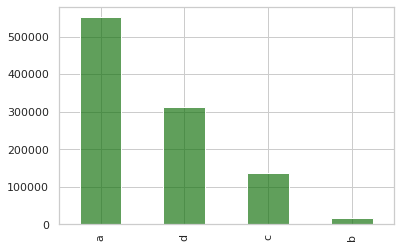

Values in %
a    52.835258
c    46.349374
b     0.815368
Name: Assortment, dtype: float64


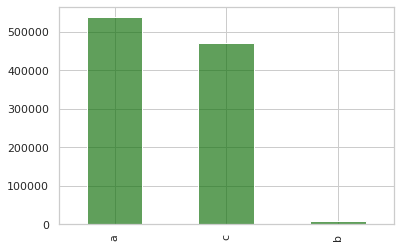

Values in %
0    84.062076
0    12.885454
a     1.991724
b     0.657682
c     0.403064
Name: StateHoliday, dtype: float64


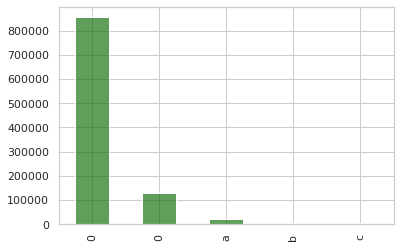

Values in %
2    25.344841
1    25.182042
3    25.019440
0    24.453677
Name: WeekOfMonth, dtype: float64


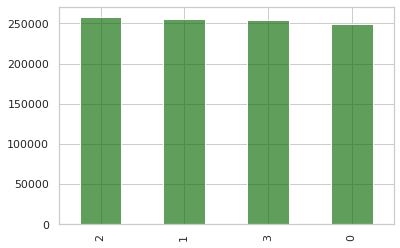

Values in %
Summer    35.952297
Winter    25.649006
Spring    20.059300
Fall      18.339397
Name: Season, dtype: float64


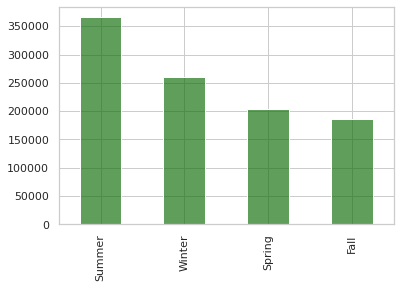

In [ ]:
categorical_data = df[df.select_dtypes(include=[object]).columns]
for feature in categorical_data:
    column_hist(feature)

In [ ]:
for feature in df.select_dtypes(include=[object]).columns:
    if feature != 'Date':
        df[feature] = df[feature].astype('category')
        df[feature] = df[feature].cat.codes

In [ ]:
for feature in test_df.select_dtypes(include=[object]).columns:
    if feature != 'Date':
        test_df[feature] = test_df[feature].astype('category')
        test_df[feature] = test_df[feature].cat.codes

# Data corr analyse

<AxesSubplot:>

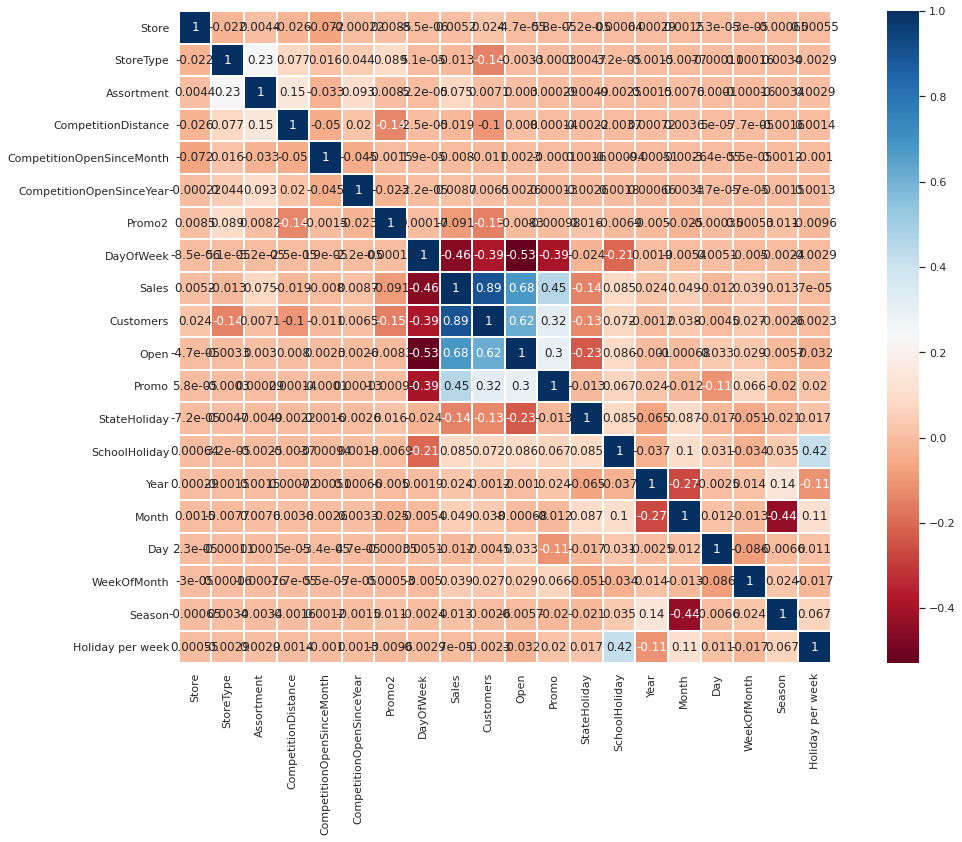

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

In [ ]:
drop_corr_columns = ["Open"]
df.drop(drop_corr_columns, axis=1)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfMonth,Season,Holiday per week
0,1,2,0,1270.0,9.0,2008.0,0,5,2015-07-31,5263,555,1,1,1,2015,7,31,3,2,5
1,1,2,0,1270.0,9.0,2008.0,0,4,2015-07-30,5020,546,1,1,1,2015,7,30,3,2,5
2,1,2,0,1270.0,9.0,2008.0,0,3,2015-07-29,4782,523,1,1,1,2015,7,29,3,2,5
3,1,2,0,1270.0,9.0,2008.0,0,2,2015-07-28,5011,560,1,1,1,2015,7,28,3,2,5
4,1,2,0,1270.0,9.0,2008.0,0,1,2015-07-27,6102,612,1,1,1,2015,7,27,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,3,2,5350.0,4.0,2013.0,1,5,2013-01-11,5142,351,1,1,1,2013,1,11,2,3,5
1017205,1115,3,2,5350.0,4.0,2013.0,1,4,2013-01-10,5007,339,1,1,1,2013,1,10,2,3,5
1017206,1115,3,2,5350.0,4.0,2013.0,1,3,2013-01-09,4649,324,1,1,1,2013,1,9,2,3,5
1017207,1115,3,2,5350.0,4.0,2013.0,1,2,2013-01-08,5243,341,1,1,1,2013,1,8,2,3,5


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


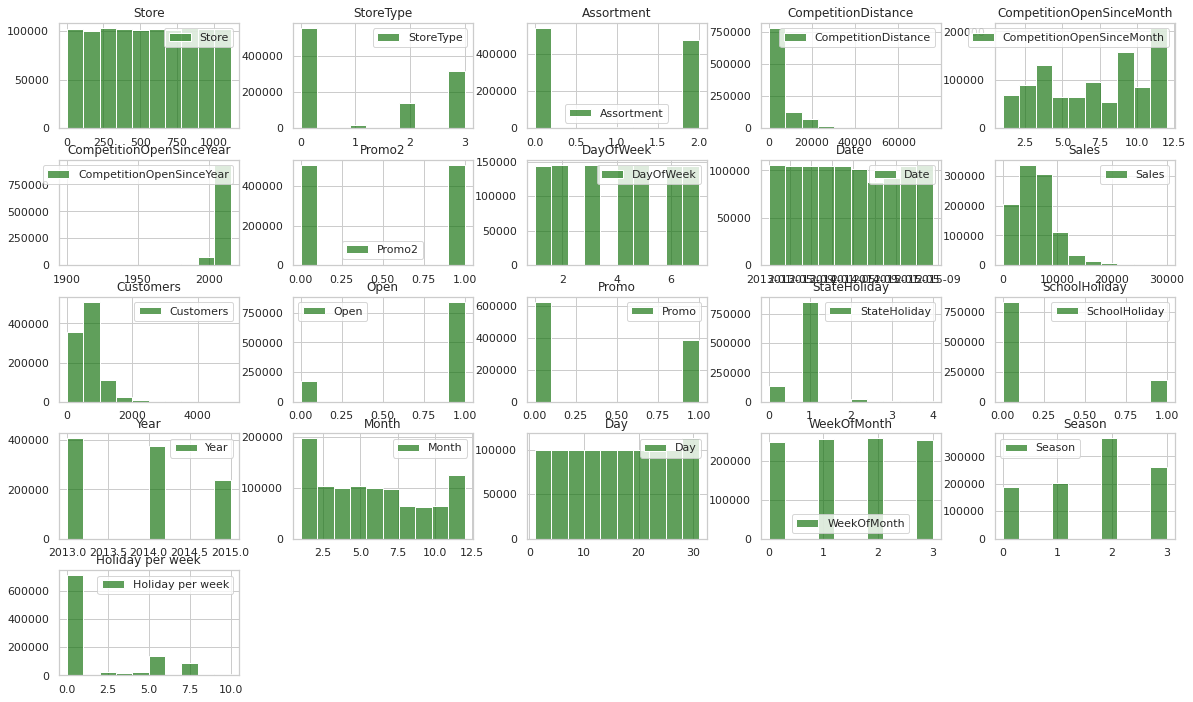

In [ ]:
df.hist(figsize=(20,12), color="#107009AA", legend=True)
plt.show()

In [ ]:
test_df.drop(["Open"], axis = 1)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Id,DayOfWeek,Date,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfMonth,Season,Holiday per week
0,1,2,0,1270.0,9.0,2008.0,0,1,4,2015-09-17,1,0,0,2015,9,17,2,0,0
1,1,2,0,1270.0,9.0,2008.0,0,857,3,2015-09-16,1,0,0,2015,9,16,2,0,0
2,1,2,0,1270.0,9.0,2008.0,0,1713,2,2015-09-15,1,0,0,2015,9,15,2,0,0
3,1,2,0,1270.0,9.0,2008.0,0,2569,1,2015-09-14,1,0,0,2015,9,14,2,0,0
4,3,0,0,14130.0,12.0,2006.0,1,2,4,2015-09-17,1,0,0,2015,9,17,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1115,3,2,5350.0,4.0,2012.0,1,29960,5,2015-08-14,0,0,1,2015,8,14,1,1,7
41084,1115,3,2,5350.0,4.0,2012.0,1,30816,4,2015-08-13,0,0,1,2015,8,13,1,1,7
41085,1115,3,2,5350.0,4.0,2012.0,1,31672,3,2015-08-12,0,0,1,2015,8,12,1,1,7
41086,1115,3,2,5350.0,4.0,2012.0,1,32528,2,2015-08-11,0,0,1,2015,8,11,1,1,7


# StoreType analyse

In [ ]:
df.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
0,551627.0,5737.928807,3962.377952,0.0,3508.0,5618.0,7860.00,30000.0
1,15830.0,10048.353064,5235.822646,0.0,6227.0,9025.5,13082.75,30000.0
2,136840.0,5723.607279,3721.553547,0.0,3789.0,5766.0,7849.00,30000.0
3,312912.0,5641.681882,3472.329515,0.0,3986.0,5826.0,7691.00,30000.0


In [ ]:
df.groupby('StoreType')['Customers', 'Sales'].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Customers,Sales
StoreType,,
0,363539046,3165196454
1,31462811,159065429
2,92129705,783218420
3,156904995,1765349961


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


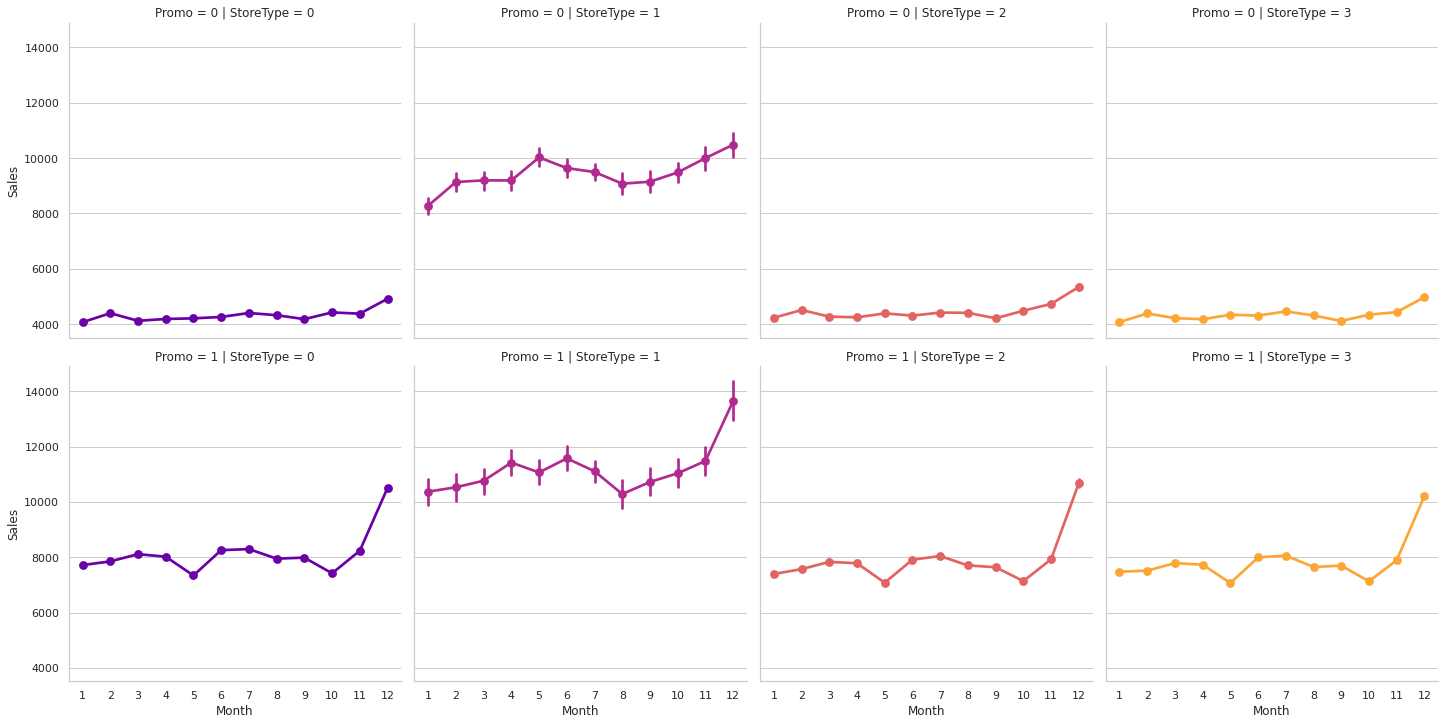

In [ ]:
sns.factorplot(data = df, x = 'Month', y = "Sales", 
               col = 'StoreType',
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo',
               color = 'red') 

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


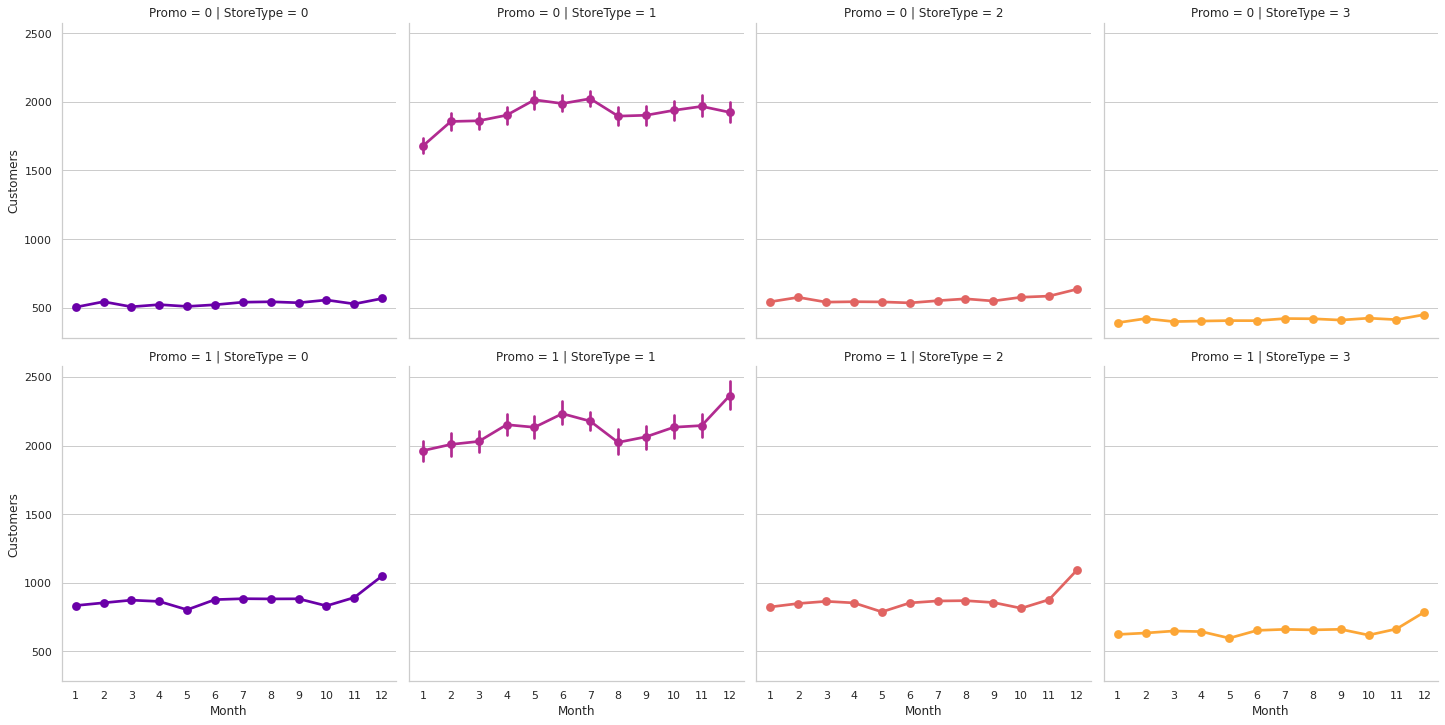

In [ ]:
sns.factorplot(data = df, x = 'Month', y = "Customers", 
               col = 'StoreType',
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo',
               color = 'red') 

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


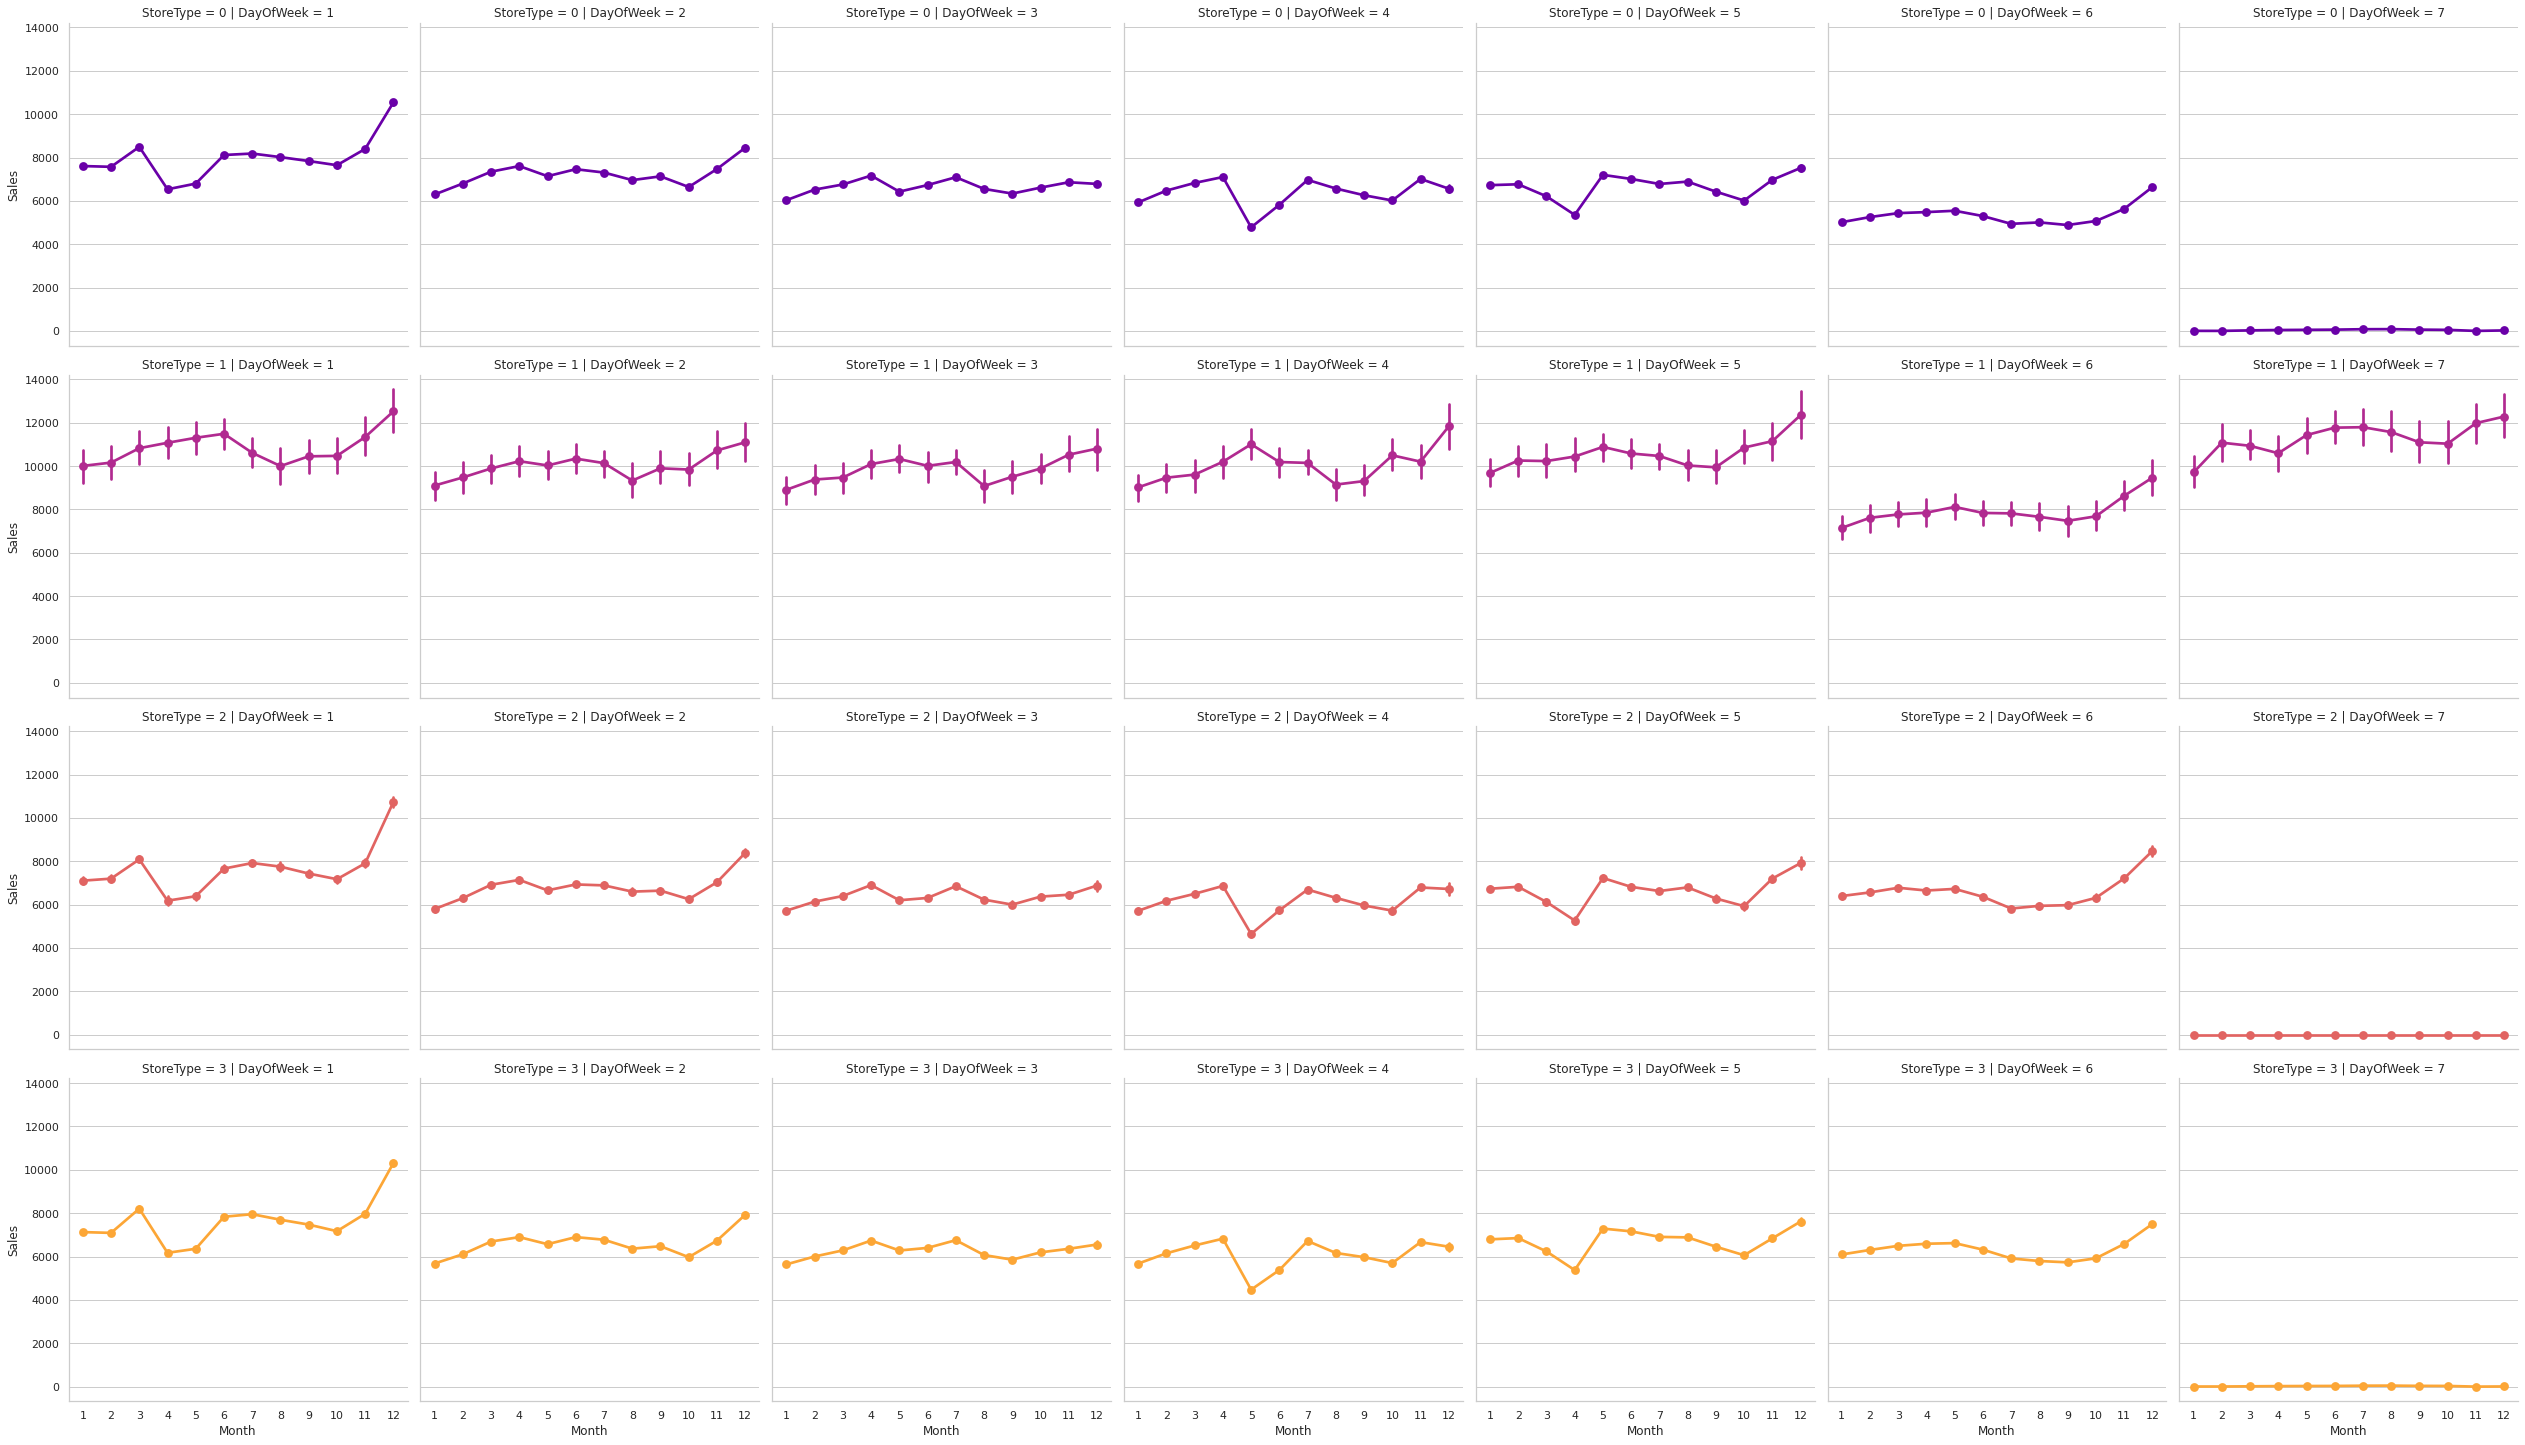

In [ ]:
sns.factorplot(data = df, x = 'Month', y = "Sales", 
               col = 'DayOfWeek',
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType',
               color = 'red') 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  int8          
 2   Assortment                 1017209 non-null  int8          
 3   CompetitionDistance        1017209 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  float64       
 5   CompetitionOpenSinceYear   1017209 non-null  float64       
 6   Promo2                     1017209 non-null  int64         
 7   DayOfWeek                  1017209 non-null  int64         
 8   Date                       1017209 non-null  datetime64[ns]
 9   Sales                      1017209 non-null  int64         
 10  Customers                  1017209 non-null  int64         
 11  Open                       1017209 no

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  int64         
 1   StoreType                  41088 non-null  int8          
 2   Assortment                 41088 non-null  int8          
 3   CompetitionDistance        41088 non-null  float64       
 4   CompetitionOpenSinceMonth  41088 non-null  float64       
 5   CompetitionOpenSinceYear   41088 non-null  float64       
 6   Promo2                     41088 non-null  int64         
 7   Id                         41088 non-null  int64         
 8   DayOfWeek                  41088 non-null  int64         
 9   Date                       41088 non-null  datetime64[ns]
 10  Open                       41088 non-null  float64       
 11  Promo                      41088 non-null  int64         
 12  Stat

# Modeling

In [ ]:
X_train=df[:int(df.shape[0]*80/100)].drop(["Date", "Sales"], axis=1)
Y_train=df[:int(df.shape[0]*80/100)]["Sales"]
X_test=df[int(df.shape[0]*80/100):].drop(["Date", "Sales"], axis=1)
Y_test=df[int(df.shape[0]*80/100):]["Sales"]

In [ ]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def RMSPE(y_predict, y):
    w = ToWeight(y_predict)
    rmspe = np.sqrt(np.mean( w * (y_predict - y)**2 ))
    return rmspe 

In [ ]:
def train_and_predict(name, algorithm, train_data, test_data):
    algorithm.fit(train_data['x'], train_data['y'])
    print(name, " model")
    y_pred=base_lgb_model.predict(test_data['x'])
    y_pred = np.array(list(map(lambda x: 0 if x < 0 else x, y_pred)))
    rsmpe = RMSPE(y_pred, test_data['y'])
    print("RSMPE : ", rsmpe)
    print("Model score : ",algorithm.score(test_data['x'], test_data['y']))
    pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':test_data['y']}).reset_index(drop=True)
    print(pred_df.head())
    print('-'*100)
    return rsmpe

In [ ]:
import lightgbm as lgb
base_lgb_model = lgb.LGBMRegressor(n_leaves=50,
                               n_estimators=700, 
                               max_depth=-1,  
                               learning_rate=0.3, #0.1
                               subsample=1,
                               colsample_bytree=0.8,
                               reg_alpha=0.1,
                               reg_lambda=1)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg_model=LinearRegression()

In [ ]:
models = {
    "LGBMRegressor": base_lgb_model,
    "LinearRegression": linear_reg_model
}

In [ ]:
models_rsmpe = {}
for model in models:
    models_rsmpe[model] = train_and_predict(model, models[model], {'x': X_train, 'y': Y_train}, {'x': X_test, 'y':Y_test})

[LightGBM] [Warning] Unknown parameter: n_leaves
LGBMRegressor  model
RSMPE :  0.2834157051200664
Model score :  0.9871110926466314
   Predictions  Actual
0  4351.977180    4709
1  4407.575904    4830
2  4551.718381    5006
3  4503.448086    4840
4     0.000000       0
----------------------------------------------------------------------------------------------------
LinearRegression  model
RSMPE :  0.2834157051200664
Model score :  0.8718020275456615
   Predictions  Actual
0  4351.977180    4709
1  4407.575904    4830
2  4551.718381    5006
3  4503.448086    4840
4     0.000000       0
----------------------------------------------------------------------------------------------------


In [ ]:
print(models_rsmpe)
print("Min rsmpe :", models_rsmpe[min(models_rsmpe.items(), key=lambda x: x[1])[0]], "in  model : ", min(models_rsmpe.items(), key=lambda x: x[1])[0])

{'LGBMRegressor': 0.2834157051200664, 'LinearRegression': 0.2834157051200664}
Min rsmpe : 0.2834157051200664 in  model :  LGBMRegressor


In [ ]:
X_final_train = df.drop(["Date","Sales"], axis=1)
Y_final_train = df["Sales"]
X_final_test = test_df.drop(["Date"], axis=1)
test_id = X_final_test["Id"]
X_final_test = X_final_test.drop(["Id"], axis=1)

In [ ]:
X_final_train, X_final_test = X_final_train.align(X_final_test, join = 'inner', axis = 1)
print('Train data : ', X_final_train.shape)
print('Test data : ', X_final_test.shape)

Train data :  (1017209, 18)
Test data :  (41088, 18)


In [ ]:
model = models[min(models_rsmpe.items(), key=lambda x: x[1])[0]]
model.fit(X_final_train, Y_final_train)
y_pred=base_lgb_model.predict(X_final_test)

[LightGBM] [Warning] Unknown parameter: n_leaves


In [ ]:
submit = pd.DataFrame(y_pred, columns = ['Sales'])
submit['Id'] = test_id
submit.to_csv('submission.csv', index = False)